# Multi-axis figures: advanced methods 

The `plt.plot()` way of making multi-panel (`axes`) figures is great for simple figures, consisting of anything from 1 panel figures to a 2x2 panel figure or so, where each panel is the same size.

For more complicated figures, however, there are a few other ways to add multiple subplots to our figures that allow us more flexibility in terms of the sizes and layout of our subplots.

In this tutorial, we will cover these primary methods, which are using

`plt.subplots()` (note the 's' - `plt.subplots()` is different than `plt.subplot()`!), 

a sub-plot mosaic (`subplot_mosaic()`), 

subfigures (multiple figures in a single "canvas"), 

or a "grid specification".

### as always, let's import our libraries

In [61]:
import numpy as np
import matplotlib.pyplot as plt

### adding subplots with `subplots()`

The "go to" alternative to `plt.subplot()` for figures with a simple grid of sub-plots with same size is `plt.subplots()`. This makes all of our subplots in one command, and gives us `axes` objects that we can use to do our plotting.

Run the following code:

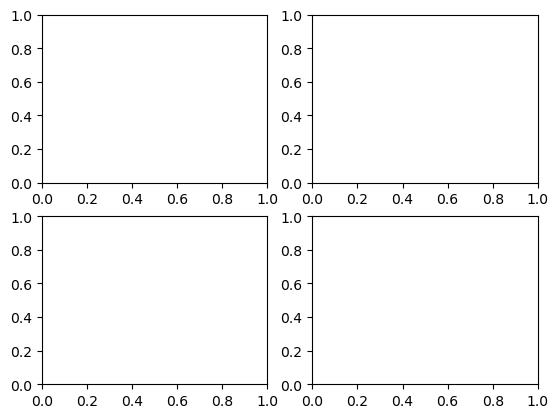

In [62]:
fig, axs = plt.subplots(ncols=2, nrows=2)

What has it done?

Notice that, in addition to making a 2x2 grid of axes, its return values have been assigned to `fig` and `axs` - let's look at these.

The first, `fig`, refers to the entire figure, and we can use it to do figure level stuff, like set the overall background color.

Now let's look at `axs`:

In [68]:
axs

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

Interesting, `axs` is an array! Like any other array, it has cells but, in this case, the cells contain the names of our `axes` objects. So if we wanted to do some plotting in the upper left cell, we would do `axs[0,0].plot(...)`, etc.

Let's make some stuff to plot:

In [75]:
x = np.linspace(-10, 10, 10)
y1 = x
y2 = x**2
y3 = x**3
y4 = x**4

And plot:

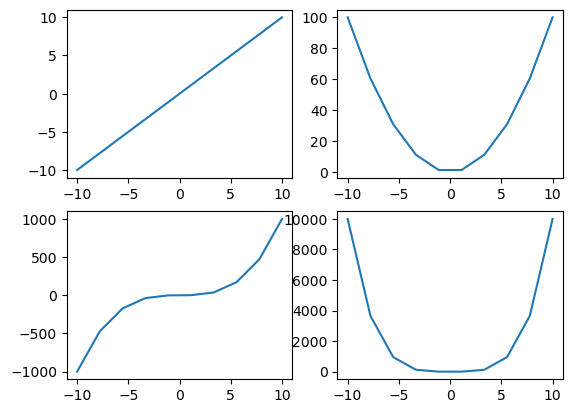

In [76]:
fig, axs = plt.subplots(ncols=2, nrows=2)

axs[0, 0].plot(x, y1);
axs[0, 1].plot(x, y2);
axs[1, 0].plot(x, y3);
axs[1, 1].plot(x, y4);

So what advantages does this have over using `plt.subplot()`? We can see two right now. First, we don't have to respecify the same grid every time we plot. Second, and more importantly, *we address the `axes` exactly as they are laid out in the figure* - we refer to each individual `axes` by it's location in the figure.

A little pair of `for` loops will illustrate this nicely. We'll loop through the rows and columns, and put an annotation on each `axes` labeling it:

Text(0.5, 0.98, 'plt.subplots()')

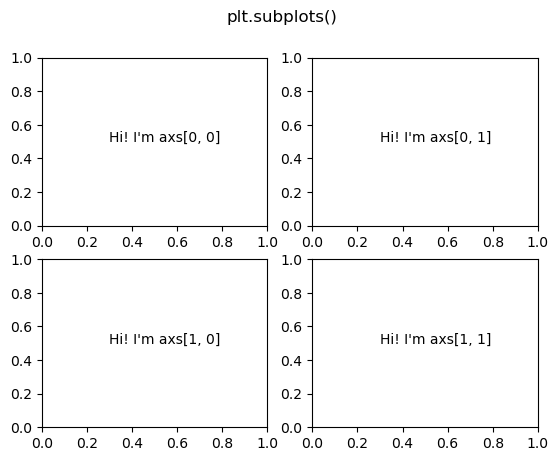

In [78]:
fig, axs = plt.subplots(ncols=2, nrows=2)
# add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].annotate(f'Hi! I\'m axs[{row}, {col}]', (0.3, 0.5))
fig.suptitle('plt.subplots()')

Notice that we also used `fig` to put a title on the whole figure.

In [79]:
y = [[y1, y2],
    [y3, y4]]

Text(0.5, 0.98, 'plt.subplots()')

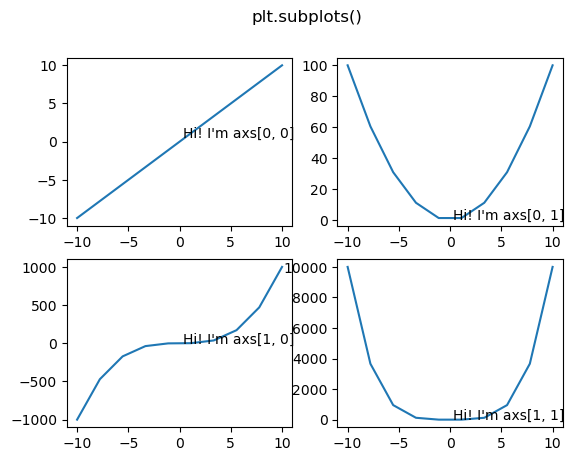

In [92]:
fig, axs = plt.subplots(ncols=2, nrows=2)
# add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].plot(x, y[row][col])
        axs[row, col].annotate(f'Hi! I\'m axs[{row}, {col}]', (0.3, 0.5))
fig.suptitle('plt.subplots()')

In [91]:
y[0][0]

array([-10.        ,  -7.77777778,  -5.55555556,  -3.33333333,
        -1.11111111,   1.11111111,   3.33333333,   5.55555556,
         7.77777778,  10.        ])

#### specifying size

Text(0.5, 0.98, 'plt.subplots()')

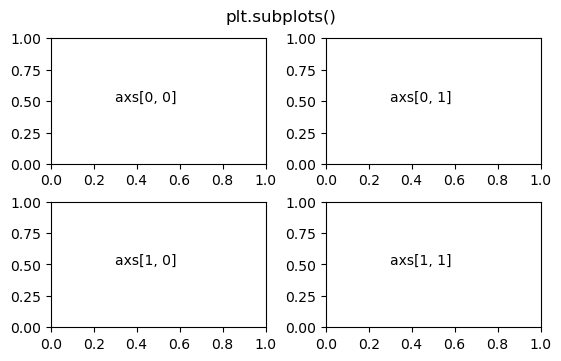

In [11]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5),
                        layout="constrained")
# add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].annotate(f'axs[{row}, {col}]', (0.3, 0.5))
fig.suptitle('plt.subplots()')

#### specifying layout

Text(0.5, 0.98, 'plt.subplots()')

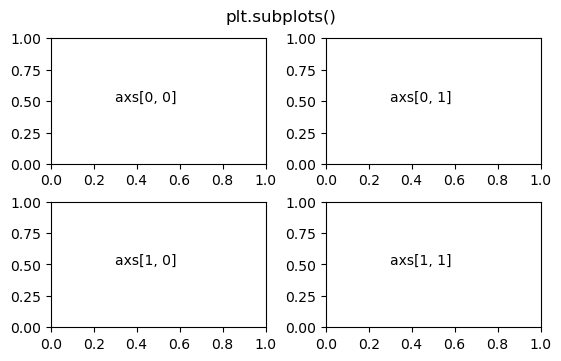

In [11]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5),
                        layout="constrained")
# add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].annotate(f'axs[{row}, {col}]', (0.3, 0.5))
fig.suptitle('plt.subplots()')

#### setting the aspect ratio of plots

Text(0.5, 0.98, 'Fixed aspect Axes')

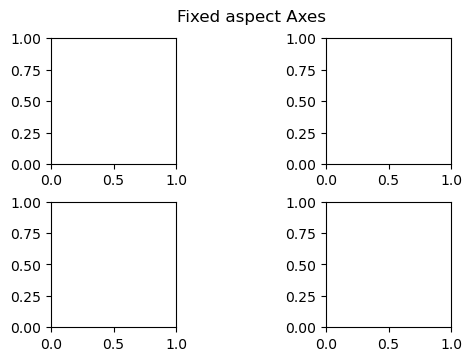

In [23]:
fig, axs = plt.subplots(2, 2, layout="constrained", figsize=(5.5, 3.5))
for ax in axs.flat:
    ax.set_aspect(1)
fig.suptitle('Fixed aspect Axes')

#### tightening up the layout

We can play around with the figure size to clean things up.

Text(0.5, 0.98, 'tight')

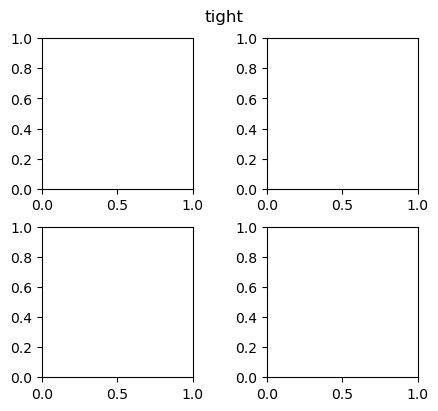

In [31]:
fig, axs = plt.subplots(2, 2, layout="constrained", figsize=(4.5, 4.0))
for ax in axs.flat:
    ax.set_aspect(1)
fig.suptitle('better fixed aspect ratio plot')

### setting fontsizes and stuff

Text(0.5, 0, 'hey')

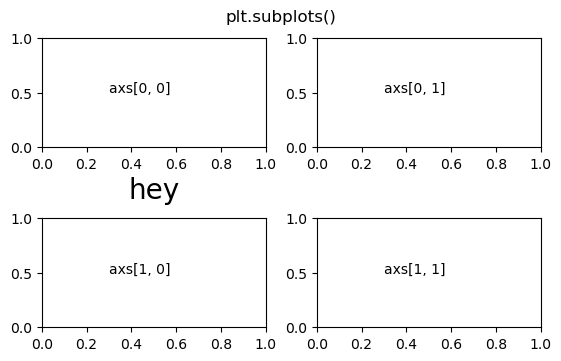

In [35]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5),
                        layout="constrained")
# add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].annotate(f'axs[{row}, {col}]', (0.3, 0.5))
fig.suptitle('plt.subplots()')
axs[0,0].set_xlabel('hey', fontsize = 20)

### adding subplots with `subplot_mosaic()`

Text(0.5, 0.98, 'plt.subplot_mosaic()')

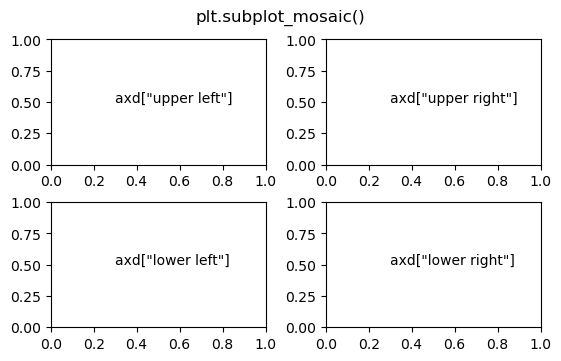

In [12]:
fig, axd = plt.subplot_mosaic([['upper left', 'upper right'],
                               ['lower left', 'lower right']],
                              figsize=(5.5, 3.5), layout="constrained")
for k in axd:
    axd[k].annotate(f'axd["{k}"]', (0.3, 0.5))
fig.suptitle('plt.subplot_mosaic()')

In [21]:
axd

{'upper left': <AxesSubplot:label='upper left'>,
 'upper right': <AxesSubplot:label='upper right'>,
 'lower left': <AxesSubplot:label='lower left'>,
 'lower right': <AxesSubplot:label='lower right'>}

Text(0.5, 0.98, 'plt.subplot_mosaic()')

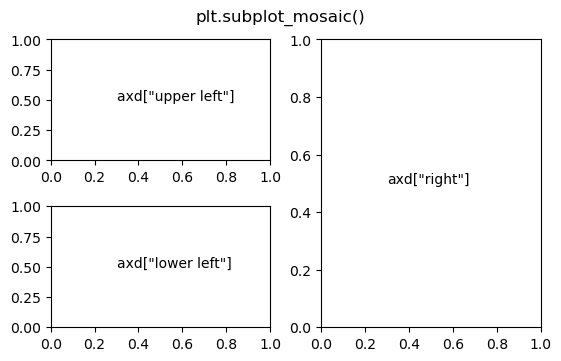

In [37]:
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              figsize=(5.5, 3.5), layout="constrained")
for k in axd:
    axd[k].annotate(f'axd["{k}"]', (0.3, 0.5))
fig.suptitle('plt.subplot_mosaic()')

Text(0.5, 0.98, 'plt.subplot_mosaic()')

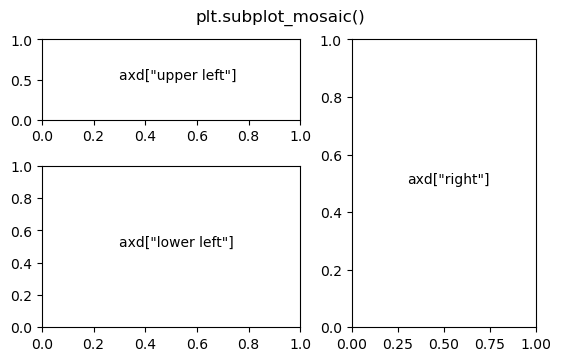

In [38]:
gs_kw = dict(width_ratios=[1.4, 1], height_ratios=[1, 2])
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              gridspec_kw=gs_kw, figsize=(5.5, 3.5),
                              layout="constrained")
for k in axd:
    axd[k].annotate(f'axd["{k}"]', (0.3, 0.5))
fig.suptitle('plt.subplot_mosaic()')

### Subfigures on our canvas

Text(0.02, 0.5, 'ylabel for subfigs[1]')

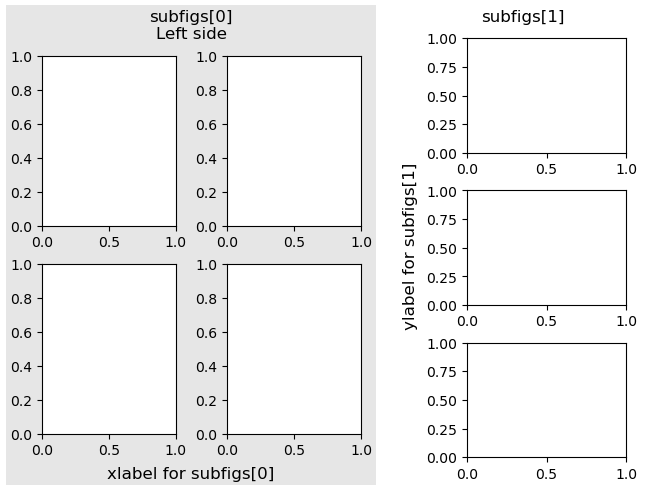

In [39]:
fig = plt.figure(layout="constrained")
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1.5, 1.])
axs0 = subfigs[0].subplots(2, 2)
subfigs[0].set_facecolor('0.9')
subfigs[0].suptitle('subfigs[0]\nLeft side')
subfigs[0].supxlabel('xlabel for subfigs[0]')

axs1 = subfigs[1].subplots(3, 1)
subfigs[1].suptitle('subfigs[1]')
subfigs[1].supylabel('ylabel for subfigs[1]')

### adding subplots with a gridspec


Text(0.5, 0.98, 'Manually added subplots, spanning a column')

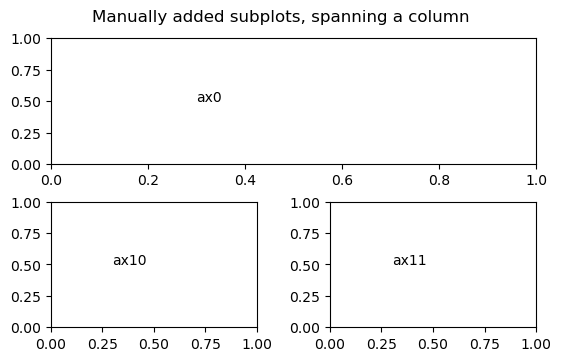

In [42]:
fig = plt.figure(figsize=(5.5, 3.5), layout="constrained")
spec = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(spec[0, :])
ax0.annotate('ax0', (0.3, 0.5))

ax10 = fig.add_subplot(spec[1, 0])
ax10.annotate('ax10', (0.3, 0.5))

ax11 = fig.add_subplot(spec[1, 1])
ax11.annotate('ax11', (0.3, 0.5))

fig.suptitle('Manually added subplots, spanning a column')

In [55]:
my_rng = np.random.default_rng()
x = my_rng.normal(0, 1, (100,1))
y = 2*x + my_rng.normal(0, 1, x.shape)

In [56]:
x.shape

(100, 1)

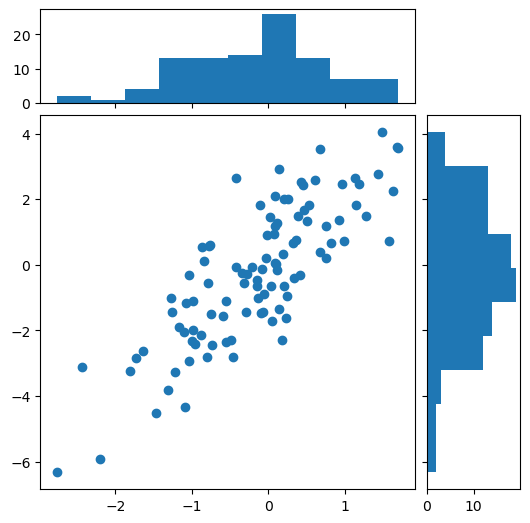

In [57]:
# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)


# no labels
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# the scatter plot:
ax.scatter(x, y);

# now determine nice limits by hand:
#binwidth = 0.25
#xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
#lim = (int(xymax/binwidth) + 1) * binwidth
#bins = np.arange(-lim, lim + binwidth, binwidth)

ax_histx.hist(x);
ax_histy.hist(y, orientation='horizontal');